<a href="https://colab.research.google.com/github/Untick/IrisID_gr2/blob/Artem-Morozov-folder/Artem%20Morozov/%D0%B8%D0%B4%D0%B5%D0%BD%D1%82%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%BF%D0%BE_%D0%B3%D0%BB%D0%B0%D0%B7%D1%83_(Iris)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт Библиотек

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D, Lambda, SpatialDropout2D
from keras.layers import Resizing
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras import utils
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np 
import random
import gc 
import shutil
import zipfile


# Загрузка и подготовка данных

In [ ]:
# Подключение google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_dir_zip = '/content/drive/MyDrive/Стажировки/идентификация по глазу (Iris)/датасет/dataset/zip'
path_extract = 'unzip'
path_train = 'Train'
path_test = 'Test'

In [ ]:



def unzip(zip_file_path, extract_to):
    if os.path.exists(extract_to):
        shutil.rmtree(extract_to)
    os.makedirs(extract_to)
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)


def create_dir(path_dir):
    try:
        if os.path.exists(path_dir):
            shutil.rmtree(path_dir)
        os.makedirs(path_dir)
    except OSError as e:
        print(f"Ошибка при создании директории {path_dir}: {e}")


def del_dir(path_dir):
    try:
        os.rmdir(path_dir)
    except OSError as e:
        print(f"Ошибка при удалении папки {path_dir}: {e}")

def move_file(file_path, move_to):
    try:
        if not os.path.exists(move_to):
            os.makedirs(move_to)

        file_name = os.path.basename(file_path)
        new_path = os.path.join(move_to,file_name)

        shutil.move(file_path, new_path)
    except Exception as e:
        print(f'Ошибка при перемещении файла: {e}')

def Check_files(path_folder):
    folders_path = os.listdir(path_folder)
    for folder in folders_path:
        path_fife = os.path.join(path_folder, folder)
        files = os.listdir(path_fife)
        for file in files:
            file_name = str(file).split('_')[0]
            if file_name != str(folder):
                print(f'Файл {file_name} не принадлежит классу в папке {str(folder)}')
                
def plot_reault(train_acc, val_acc, train_loss, val_loss):
  
  plt.figure(figsize=(16, 10))
  
  plt.subplot(2, 2, 1)
  plt.title('Точность', fontweight='bold')
  plt.plot(train_acc, label='Точность на обучащей выборке')
  plt.plot(val_acc, label='Точность на проверочной выборке')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()

  plt.subplot(2, 2, 2)
  plt.title('Ошибка', fontweight='bold')
  plt.plot(train_loss, label='Ошибка на обучающей выборке')
  plt.plot(val_loss, label='Ошибка на проверочной выборке')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()

  plt.show()

In [ ]:
# Создание директорий
create_dir(path_train)
create_dir(path_test)
create_dir(path_extract)

In [ ]:
# Извелечение и распределение файлов
files_zip = os.listdir(path_dir_zip)
for file_zip in files_zip:
    path_file_zip = os.path.join(path_dir_zip, file_zip)
    extract_to = os.path.join(path_extract, file_zip[:-4])
    unzip(path_file_zip, extract_to)

folders_unzip_dir = os.listdir(path_extract)
for folder_unzip in folders_unzip_dir:
    path_folder_unzip = os.path.join(path_extract, folder_unzip)
    img_files = os.listdir(path_folder_unzip)
    for img_file in img_files:
        file_path = os.path.join(path_folder_unzip, img_file)
        folder = os.path.splitext(img_file)[0][:-2]
        move_to = os.path.join(path_train, folder)
        move_file(file_path, move_to)
    del_dir(path_folder_unzip)

folders_train = os.listdir(path_train)
for folder_train in folders_train:
    path_img_train = os.path.join(path_train, folder_train)
    img_files_train = os.listdir(path_img_train)
    img_files_train.sort()
    for img_file_train in img_files_train:
        file_path = os.path.join(path_img_train, img_file_train)
        folder = os.path.splitext(img_file_train)[0][:-2]
        move_to = os.path.join(path_test, folder)
        move_file(file_path, move_to)
        break

del_dir(path_extract)
Check_files(path_test)
Check_files(path_train)
  

In [ ]:
Classes = os.listdir(path_train)
Classes.sort()
print(Classes)
print(len(Classes))

['001L', '001R', '002L', '002R', '003L', '003R', '004L', '004R', '005L', '005R', '006L', '006R', '007L', '007R', '008L', '008R', '009L', '009R', '010L', '010R', '011L', '011R', '012L', '012R', '013L', '013R', '014L', '014R', '015L', '015R', '016L', '016R', '017L', '017R', '018L', '018R', '019L', '019R', '020L', '020R', '021L', '021R', '022L', '022R', '023L', '023R', '024L', '024R', '025L', '025R', '026L', '026R', '027L', '027R', '028L', '028R', '029L', '029R', '030L', '030R', '031L', '031R', '032L', '032R', '033L', '033R', '034L', '034R', '035L', '035R', '036L', '036R', '037L', '037R', '038L', '038R', '039L', '039R', '040L', '040R', '041L', '041R', '042L', '042R', '043L', '043R', '044L', '044R', '045L', '045R', '046L', '046R', '047L', '047R', '048L', '048R', '049L', '049R', '050L', '050R', '051L', '051R', '052L', '052R', '053L', '053R', '054L', '054R', '055L', '055R', '056L', '056R', '057L', '057R', '058L', '058R', '059L', '059R', '060L', '060R', '061L', '061R', '062L', '062R', '063L',

In [ ]:
batch_size = 64
IMG_WIDTH = 150                          
IMG_HEIGHT = 150
Channels = 3         


In [ ]:
# Формирование массивов x_train и y_train
x_train = []
y_train = []
num_class = 0
for cls in Classes:
    path_classes = os.path.join(path_train, cls)
    images = os.listdir(path_classes)
    for img in images:
        path_images = os.path.join(path_classes, img)        
        img = Image.open(path_images)
        img = img.resize((IMG_WIDTH, IMG_HEIGHT))        
        img_np = np.array(img)
        for i in range(60):
            x_train.append(img_np)
            y_train.append(num_class)

    num_class = num_class + 1

y_train = utils.to_categorical(y_train)
x_train = np.array(x_train)
y_train = np.array(y_train)


print(f'Общий размер базы картинок: {len(x_train)} форма: {x_train.shape}')
print(f'Общий размер базы меток: {len(y_train)} форма: {y_train.shape}')  
print(f'Пример метки: {y_train[39]} ') 
print(f'Пример метки: {y_train[40]} ') 
print(f'Пример метки: {y_train[500]} ')
   

Общий размер базы картинок: 15360 форма: (15360, 150, 150, 3)
Общий размер базы меток: 15360 форма: (15360, 128)
Пример метки: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] 
Пример метки: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] 
Пример метки: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

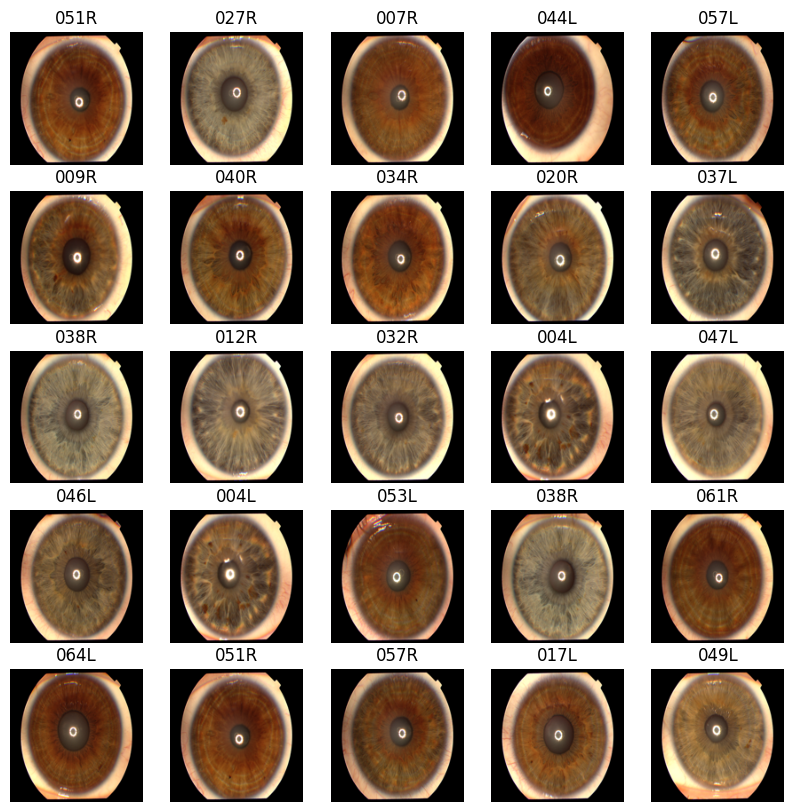

In [ ]:
# Примеры картинок с метками
fig = plt.figure(figsize=(10,10))

for i in range(25): 
    n = random.randint(0 , x_train.shape[0])   
    img = x_train[n]  
    label = Classes[np.argmax(y_train[n])] 
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [ ]:
VAL_SPLIT = 0.2
ROTATION_RANGE = 4                     
WIDTH_SHIFT_RANGE = 0.05                  
HEIGHT_SHIFT_RANGE = 0.05                  
ZOOM_RANGE = 0.05                 
BRIGHTNESS_RANGE = (0.7, 1.3)   

In [ ]:
datagen = ImageDataGenerator(
    rescale=1. / 255.,
    rotation_range=ROTATION_RANGE,
    width_shift_range=WIDTH_SHIFT_RANGE,
    height_shift_range=HEIGHT_SHIFT_RANGE,
    zoom_range=ZOOM_RANGE,
    brightness_range=BRIGHTNESS_RANGE 
)



In [ ]:
x_train_all, x_train_val, y_train_all, y_train_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle = True)

In [ ]:
train_generator = datagen.flow(
    x_train_all, y_train_all,    
    batch_size=batch_size       
    )
val_generator = datagen.flow(
    x_train_val, y_train_val,                            
    batch_size=batch_size      
)

In [ ]:
print(f'       Обучающая выборка найдено файлов   {train_generator.n}')
print(f'     Проверочная выборка найдено файлов   {val_generator.n}')
print(f'  Количество батчей в обучающей выборке   {len(train_generator)}')
print(f'Количество батчей в проверочной выборке   {len(val_generator)}')
print(f'                           Размер батча   {train_generator.batch_size}')



       Обучающая выборка найдено файлов   12288
     Проверочная выборка найдено файлов   3072
  Количество батчей в обучающей выборке   192
Количество батчей в проверочной выборке   48
                           Размер батча   64


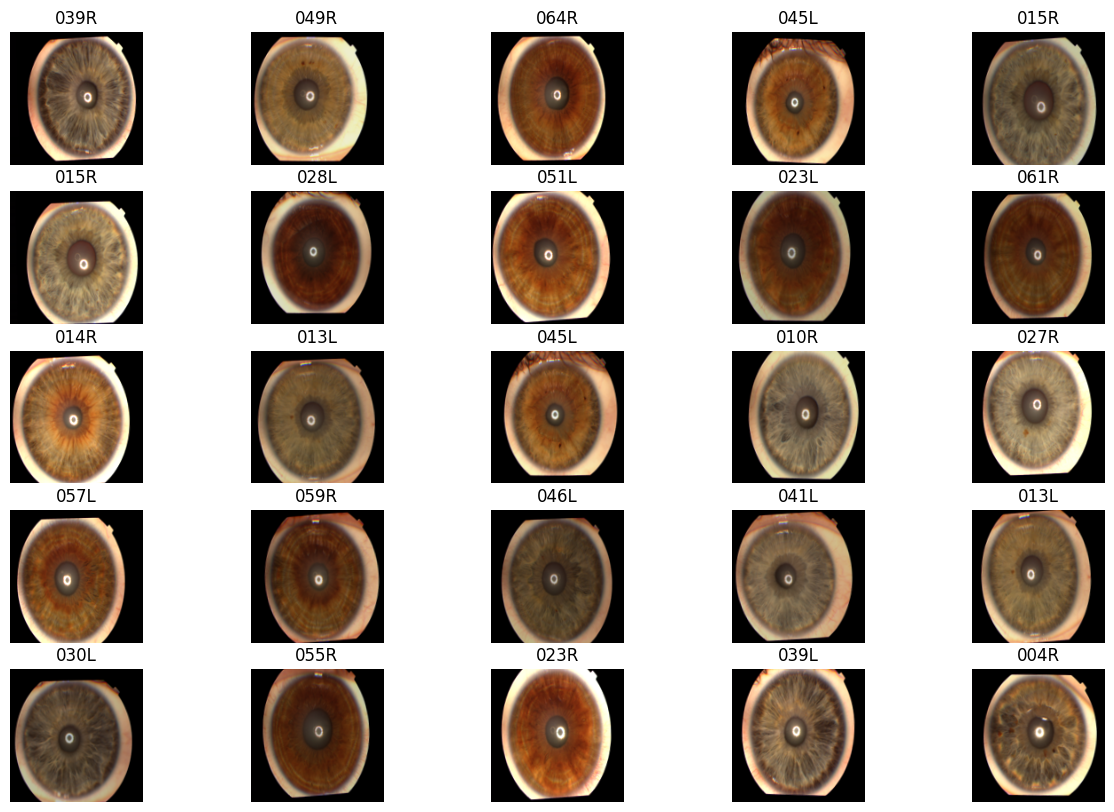

In [ ]:
# Примеры аугментированных картинок с метками

fig = plt.figure(figsize=(15,10))

for i in range(25): 
    n = random.randint(0, len(train_generator) - 1) 
    k = random.randint(0, train_generator.batch_size-1)  
    img = train_generator[n][0][k] 
    label = Classes[np.argmax(train_generator[n][1][k])] 
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()


# Обучение сети


In [ ]:
#Сборка модели
image_shape = (IMG_HEIGHT, IMG_WIDTH, Channels)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=image_shape)
global_average_layer = GlobalAveragePooling2D()
prediction_layer1 = Dense(1024, activation='relu')
prediction_layer3 = Dense(2048, activation='relu')
prediction_layer2 = Dense(128, activation='softmax')

x = base_model.output
x = global_average_layer(x)
x = Dropout(0.2)(x)
x = prediction_layer1(x)
x = prediction_layer3(x)
outputs = prediction_layer2(x)
model = tf.keras.Model(inputs = base_model.inputs, outputs = outputs)

model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
learning_rate = 0.00001
epochs = 10

model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Epoch 1/10
192/192 [==============================] - 140s 612ms/step - loss: 3.8225 - accuracy: 0.1630 - val_loss: 0.9730 - val_accuracy: 0.8584
Epoch 2/10
192/192 [==============================] - 119s 617ms/step - loss: 0.5557 - accuracy: 0.8572 - val_loss: 0.0235 - val_accuracy: 1.0000
Epoch 3/10
192/192 [==============================] - 117s 607ms/step - loss: 0.1038 - accuracy: 0.9775 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 4/10
192/192 [==============================] - 120s 623ms/step - loss: 0.0486 - accuracy: 0.9902 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/10
192/192 [==============================] - 116s 605ms/step - loss: 0.0308 - accuracy: 0.9930 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 6/10
192/192 [==============================] - 120s 627ms/step - loss: 0.0161 - accuracy: 0.9974 - val_loss: 3.0329e-04 - val_accuracy: 1.0000
Epoch 7/10
192/192 [==============================] - 118s 616ms/step - loss: 0.0116 - accuracy: 0.9980 - val_loss: 2.78

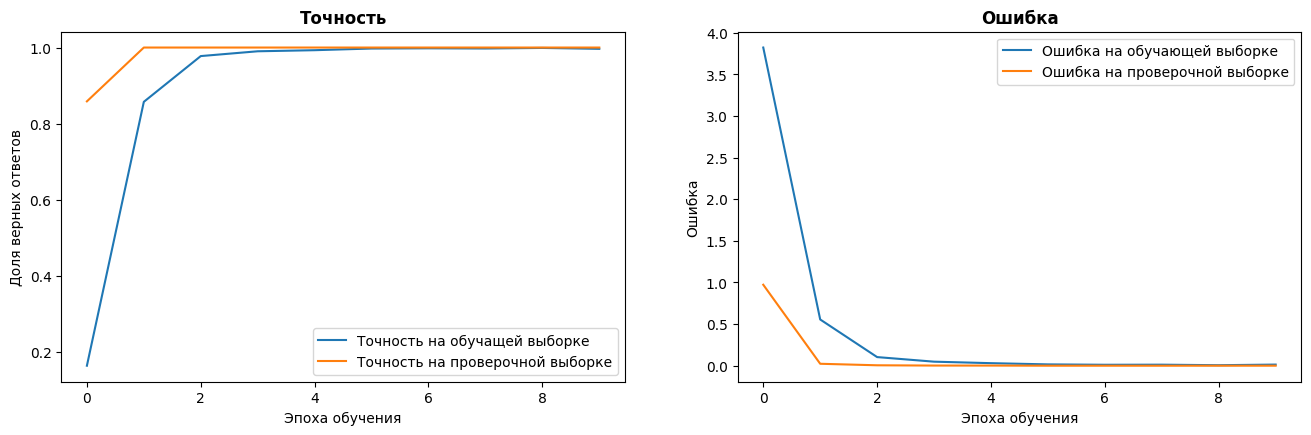

In [ ]:
History = model.fit(train_generator,                    
                    validation_data=val_generator,                    
                    epochs=epochs,
                    verbose= 1)

plot_reault(History.history['accuracy'],
            History.history['val_accuracy'],
            History.history['loss'],
            History.history['val_loss'])

# Проверка на данных которые модель не видела

In [ ]:
model.save('/content/drive/MyDrive/Стажировки/идентификация по глазу (Iris)/model.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Стажировки/идентификация по глазу (Iris)/model.h5')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
IMG_WIDTH = 150                          
IMG_HEIGHT = 150

In [ ]:
Classes = os.listdir(path_test)
Classes.sort()
print(Classes)
print(len(Classes))

['001L', '001R', '002L', '002R', '003L', '003R', '004L', '004R', '005L', '005R', '006L', '006R', '007L', '007R', '008L', '008R', '009L', '009R', '010L', '010R', '011L', '011R', '012L', '012R', '013L', '013R', '014L', '014R', '015L', '015R', '016L', '016R', '017L', '017R', '018L', '018R', '019L', '019R', '020L', '020R', '021L', '021R', '022L', '022R', '023L', '023R', '024L', '024R', '025L', '025R', '026L', '026R', '027L', '027R', '028L', '028R', '029L', '029R', '030L', '030R', '031L', '031R', '032L', '032R', '033L', '033R', '034L', '034R', '035L', '035R', '036L', '036R', '037L', '037R', '038L', '038R', '039L', '039R', '040L', '040R', '041L', '041R', '042L', '042R', '043L', '043R', '044L', '044R', '045L', '045R', '046L', '046R', '047L', '047R', '048L', '048R', '049L', '049R', '050L', '050R', '051L', '051R', '052L', '052R', '053L', '053R', '054L', '054R', '055L', '055R', '056L', '056R', '057L', '057R', '058L', '058R', '059L', '059R', '060L', '060R', '061L', '061R', '062L', '062R', '063L',

In [ ]:
# Формирование массивов x_test и y_test
x_test = []
y_test = []

num_class = 0
for cls in Classes:
    path_classes = os.path.join(path_test, cls)
    images = os.listdir(path_classes)
    for img in images:
        path_images = os.path.join(path_classes, img) 
        img = Image.open(path_images)
        img = img.resize((IMG_WIDTH, IMG_HEIGHT))  
        img_np = np.array(img) 
        x_test.append(img_np)
        y_test.append(num_class)
    num_class = num_class + 1

x_test = np.array(x_test)
x_test = x_test / 255
y_test = utils.to_categorical(y_test)
y_test = np.array(y_test)

print(f'Общий размер базы картинок: {len(x_test)} форма: {x_test.shape}')
print(f'Общий размер базы меток: {len(y_test)} форма: {y_test.shape}')  
print(f'Пример метки: {y_test[39]} ') 
print(f'Пример метки: {y_test[40]} ') 
print(f'Пример метки: {y_test[100]} ')

Общий размер базы картинок: 128 форма: (128, 150, 150, 3)
Общий размер базы меток: 128 форма: (128, 128)
Пример метки: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] 
Пример метки: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] 
Пример метки: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

1/1 [==============================] - 0s 236ms/step


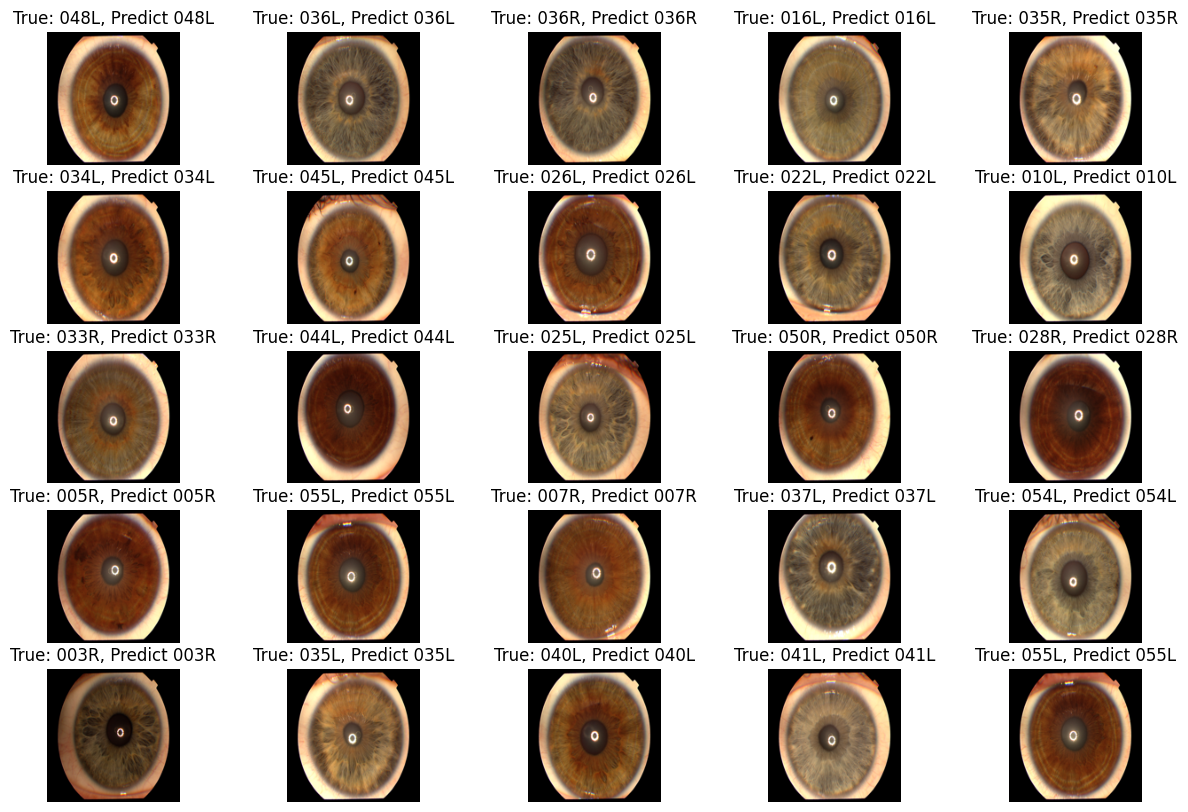

In [ ]:
fig = plt.figure(figsize=(15,10))

for i in range(25): 
    n = random.randint(0, len(x_test) - 1)     
    img = x_test[n]    
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(img)
    ax.axis('off')
    img_np = np.array([x_test[n]])
    prediction = model.predict(img_np) 
    ax.set_title(f'True: {Classes[np.argmax(y_test[n])]}, Predict {Classes[np.argmax(prediction)]}') 
    
    
plt.show()   


In [ ]:
scores = model.evaluate(x_test, y_test)

4/4 [==============================] - 36s 8s/step - loss: 0.1134 - accuracy: 0.9766
